In [23]:
from sympy import Symbol,solve
import numpy as np
import matplotlib.pyplot as plt
import random

%matplotlib inline
r_m=76.2
beta_T=0.82
h_0=2.46
c=0.05
x_f=26.6
beta_f=0.28
q_f=0.83
A=3.55
beta_g=beta_f
x_g=x_f
p=10
N=5000

In [24]:
# Structral connectivity matrix

#Firing rate pattern
xi_pattern=np.random.normal(0,1,size=(p,N))
r_pattern=r_m/(1+np.exp(-beta_T*(xi_pattern-h_0)))
print(r_pattern)
C=np.zeros((N,N),dtype='int8')
for i in range(N):
    for j in range(N):
        if random.uniform(0,1)<c:
            C[i,j]=1

[[13.81838839  2.98155668  5.05182245 ... 12.80751487  2.94245816
   7.26328708]
 [10.71052986 21.94684272 20.48083715 ...  9.91756738  5.38097415
   2.90298384]
 [ 6.24036278  8.16638556 17.60655189 ...  3.09044006 11.48468208
  10.35961992]
 ...
 [ 9.95973837  6.32703003  8.2143109  ... 19.40016277  4.58252868
   7.33448146]
 [ 2.98744618 16.88971625 26.70288222 ...  6.51321727  9.77046652
   3.40123823]
 [ 6.56146303 22.21872588  8.57668785 ...  6.04437399 14.96519243
   5.02229411]]


In [25]:
#x = Symbol('x')
#def func(z):
#    I=np.exp(-z**2/2)*(2*x-1+np.tanh(beta_g*(r_m/(1+np.exp(-beta_T*(z-h_0)))-x_g)))
#    return I
#Sum2=0
#for i in range(N):
#    Sum2=Sum2+func(xi_pattern[0,i])
#q_g=solve(Sum2,x)[0]
#print(q_g)

In [26]:
#Final connectivity matrix J
q_g=0.99
J=np.zeros((N,N))
def f(r):
    return 0.5*(2*q_f-1+np.tanh(beta_f*(r-x_f)))
def g(r):
    return 0.5*(2*q_g-1+np.tanh(beta_g*(r-x_g)))
#equation 2
Sum=np.zeros((N,N))
for k in range(p):
    Sum=Sum+np.dot(f(np.transpose(r_pattern[k])).reshape(N,1),g(r_pattern[k]).reshape(1,N))
J=A*C/c/N*Sum
for i in range(N):
    J[i,i]=0

In [27]:
# initial firing rate
r0=np.random.uniform(0,5,N)
#for i in range(p):
#    for j in range(N):
#        r0[j]=np.random.normal(r_pattern[i,j],1)
print(r0)

[0.51078102 3.22344486 4.49126478 ... 0.94225975 1.70611496 2.94748996]


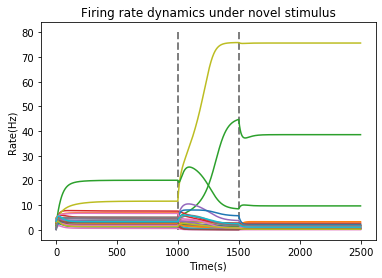

In [28]:
#Novel stimulus
t_p=0
t_max=2500+t_p
r=np.zeros((N,t_max))
tau=20
t_pre=1000+t_p
t_delay=1500+t_p
dt=1
I0=1
ita=np.random.normal(0,1,size=N)
I=I0*ita
r[:,0]=r0
def phi(xi):
    return r_m/(1+np.exp(-beta_T*(xi-h_0)))
for t in range(1,t_pre):
    xi=np.dot(J,r[:,t-1])
    r[:,t]=r[:,t-1]+(-r[:,t-1]+phi(xi))/tau*dt #equation 1
for t in range(t_pre,t_delay):
    xi=np.dot(J,r[:,t-1])
    r[:,t]=r[:,t-1]+(-r[:,t-1]+phi(I+xi))/tau*dt #equation 1
for t in range(t_delay,t_max):
    xi=np.dot(J,r[:,t-1])
    r[:,t]=r[:,t-1]+(-r[:,t-1]+phi(xi))/tau*dt #equation 1
plt.figure()
plt.title('Firing rate dynamics under novel stimulus')
plt.xlabel('Time(s)')
plt.ylabel('Rate(Hz)')
plt.vlines(t_pre-t_p, 0,80, colors = "grey", linestyles = "dashed",linewidth=2)
plt.vlines(t_delay-t_p, 0,80, colors = "grey", linestyles = "dashed",linewidth=2)
for i in range(30):
    plt.plot(range(0,t_max-t_p),r[i,t_p:t_max])
plt.savefig('Figures/novel_stimulus.png')

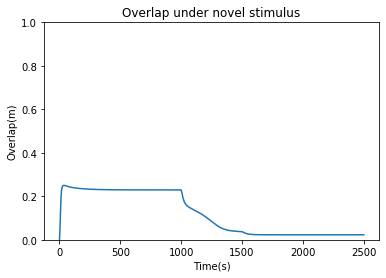

In [29]:
#Overlap
import scipy.stats
p_r=np.zeros(t_max-t_p)
for t in range(0,t_max-t_p):
    p_r[t]=scipy.stats.pearsonr(r[:,t+t_p],r_pattern[0])[0]
plt.figure()
plt.ylim(0,1)
plt.plot(range(0,t_max-t_p),p_r)
plt.title('Overlap under novel stimulus')
plt.xlabel('Time(s)')
plt.ylabel('Overlap(m)')
plt.savefig("Figures/overlap_novel.png")

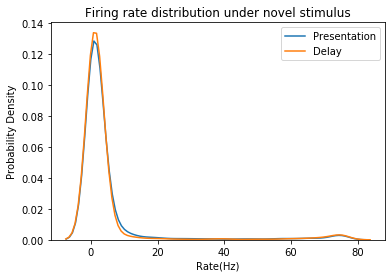

In [30]:
import seaborn as sns
plt.figure()
plt.title('Firing rate distribution under novel stimulus')
plt.xlabel('Rate(Hz)')
plt.ylabel('Probability Density')
sns.kdeplot(r[:,t_delay-1],label='Presentation')
sns.kdeplot(r[:,t_max-1],label='Delay')

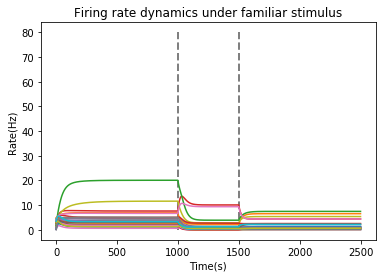

In [31]:
#Familiar Stimulus
I=I0*xi_pattern[0]
r[:,0]=r0
for t in range(1,t_pre):
    xi=np.dot(J,r[:,t-1])
    r[:,t]=r[:,t-1]+(-r[:,t-1]+phi(xi))/tau*dt #equation 1
for t in range(t_pre,t_delay):
    xi=np.dot(J,r[:,t-1])
    r[:,t]=r[:,t-1]+(-r[:,t-1]+phi(I+xi))/tau*dt #equation 1
for t in range(t_delay,t_max):
    xi=np.dot(J,r[:,t-1])
    r[:,t]=r[:,t-1]+(-r[:,t-1]+phi(xi))/tau*dt #equation 1
plt.figure()
plt.title('Firing rate dynamics under familiar stimulus')
plt.xlabel('Time(s)')
plt.ylabel('Rate(Hz)')
for i in range(30):
    plt.plot(range(0,t_max-t_p),r[i,t_p:t_max])
plt.vlines(t_pre-t_p, 0,80, colors = "grey", linestyles = "dashed",linewidth=2)
plt.vlines(t_delay-t_p, 0,80, colors = "grey", linestyles = "dashed",linewidth=2)
plt.savefig('Figures/familiar_stimulus.png')

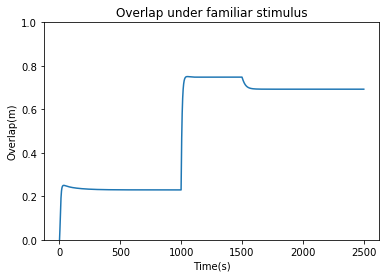

In [33]:
#Overlap
p_r=np.zeros(t_max-t_p)
for t in range(0,t_max-t_p):
    p_r[t]=scipy.stats.pearsonr(r[:,t+t_p],r_pattern[0])[0]
plt.figure()
plt.ylim(0,1)
plt.title('Overlap under familiar stimulus')
plt.xlabel('Time(s)')
plt.ylabel('Overlap(m)')
plt.plot(range(0,t_max-t_p),p_r)
plt.savefig("Figures/overlap_familiar.png")

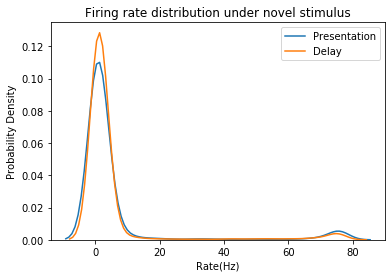

In [34]:
plt.figure()
plt.title('Firing rate distribution under novel stimulus')
plt.xlabel('Rate(Hz)')
plt.ylabel('Probability Density')
sns.kdeplot(r[:,t_delay-1],label='Presentation')
sns.kdeplot(r[:,t_max-1],label='Delay')